In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Read data
frailty_physical_data = pd.read_csv('frailty_data.csv',encoding='latin-1')  # Replace 'latin-1' with the actual encoding
print(frailty_physical_data)

   Height   Weight  Age  Grip strength Frailty
0     65.8     112   30             30       N
1     71.5     136   19             31       N
2     69.4     153   45             29       N
3     68.2     142   22             28       Y
4     67.8     144   29             24       Y
5     68.7     123   50             26       N
6     69.8     141   51             22       Y
7     70.1     136   23             20       Y
8     67.9     112   17             19       N
9     66.8     120   39             31       N


In [42]:
#Convert weight (from pounds to kilograms)
frailty_physical_data['Weight_kg'] = frailty_physical_data['Weight'] * 0.453592
#rounding the weight_kg to 2 dfecimals instead of 4 or more decimal points
frailty_physical_data['Weight_kg'] = frailty_physical_data['Weight_kg'].round(2)
frailty_physical_data

,Height,Weight,Age,Grip strength,Frailty,Weight_kg
0,65.8,112,30,30,N,50.80
1,71.5,136,19,31,N,61.69
2,69.4,153,45,29,N,69.40
3,68.2,142,22,28,Y,64.41
4,67.8,144,29,24,Y,65.32
5,68.7,123,50,26,N,55.79
6,69.8,141,51,22,Y,63.96
7,70.1,136,23,20,Y,61.69
8,67.9,112,17,19,N,50.80
9,66.8,120,39,31,N,54.43


In [43]:
# Encode the "Frailty" column
encoder = LabelEncoder()
frailty_physical_data['Frailty'] = encoder.fit_transform(frailty_physical_data['Frailty'])

# Save the DataFrame to a new CSV file (without index)
frailty_physical_data.to_csv('clean_frailty_data.csv', index=False)
frailty_physical_data

,Height,Weight,Age,Grip strength,Frailty,Weight_kg
0,65.8,112,30,30,0,50.80
1,71.5,136,19,31,0,61.69
2,69.4,153,45,29,0,69.40
3,68.2,142,22,28,1,64.41
4,67.8,144,29,24,1,65.32
5,68.7,123,50,26,0,55.79
6,69.8,141,51,22,1,63.96
7,70.1,136,23,20,1,61.69
8,67.9,112,17,19,0,50.80
9,66.8,120,39,31,0,54.43


In [44]:
#moving the weight in pounds column beside to the weight in kilo grams for easy understanding
frailty_physical_data = frailty_physical_data.iloc[:,[0,2,3,4,1,5]]
frailty_physical_data

,Height,Age,Grip strength,Frailty,Weight,Weight_kg
0,65.8,30,30,0,112,50.80
1,71.5,19,31,0,136,61.69
2,69.4,45,29,0,153,69.40
3,68.2,22,28,1,142,64.41
4,67.8,29,24,1,144,65.32
5,68.7,50,26,0,123,55.79
6,69.8,51,22,1,141,63.96
7,70.1,23,20,1,136,61.69
8,67.9,17,19,0,112,50.80
9,66.8,39,31,0,120,54.43


                Height        Age  Grip strength   Frailty    Weight  \
Height         1.000000 -0.032580      -0.167682  0.193186  0.571525   
Age           -0.032580  1.000000       0.133756 -0.083655  0.190926   
Grip strength -0.167682  0.133756       1.000000 -0.475867  0.032807   
Frailty        0.193186 -0.083655      -0.475867  1.000000  0.535200   
Weight         0.571525  0.190926       0.032807  0.535200  1.000000   
Weight_kg      0.571575  0.190919       0.032729  0.535295  1.000000   

               Weight_kg  
Height          0.571575  
Age             0.190919  
Grip strength   0.032729  
Frailty         0.535295  
Weight          1.000000  
Weight_kg       1.000000  


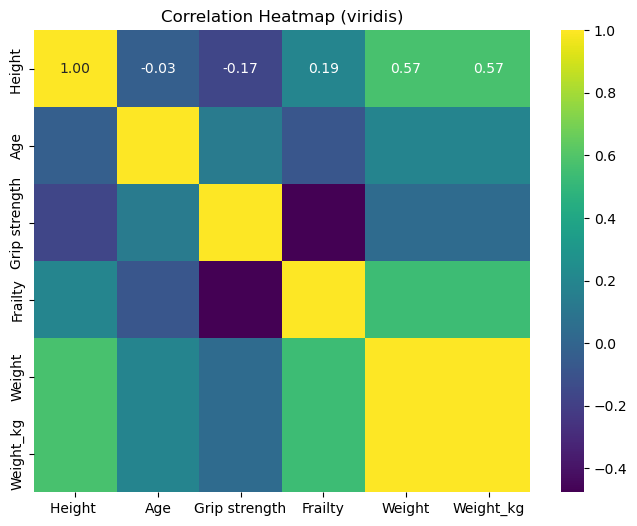

In [89]:
# Compute the correlation matrix
data = frailty_physical_data.corr()
print(data)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap (viridis)")
plt.show()

<Figure size 1000x1000 with 0 Axes>

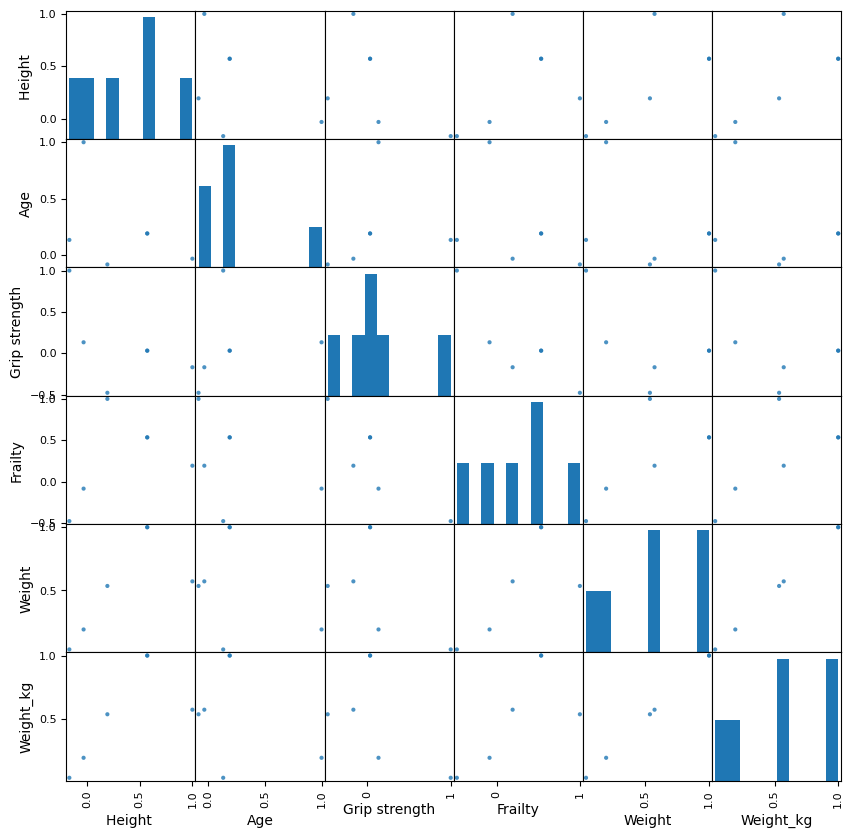

In [55]:
#Create a scatter matrix
plt.figure(figsize=(10, 10))
pd.plotting.scatter_matrix(data, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()

In [74]:
# Select all features (independent variables)
x = frailty_physical_data.iloc[:, [0, 1, 2, 4, 5]]

# Select the target variable (dependent variable)
y = frailty_physical_data.iloc[:, 3]
x

,Height,Age,Grip strength,Weight,Weight_kg
0,65.8,30,30,112,50.80
1,71.5,19,31,136,61.69
2,69.4,45,29,153,69.40
3,68.2,22,28,142,64.41
4,67.8,29,24,144,65.32
5,68.7,50,26,123,55.79
6,69.8,51,22,141,63.96
7,70.1,23,20,136,61.69
8,67.9,17,19,112,50.80
9,66.8,39,31,120,54.43


In [79]:
y

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: Frailty, dtype: int32

In [81]:
#split train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42)

In [83]:
ss_train = StandardScaler()
x_train = ss_train.fit_transform(x_train)
ss_test = StandardScaler()
x_test = ss_test.fit_transform(x_test)

In [91]:
model = RandomForestClassifier(random_state=0)

# Train the model on the training data
model.fit(x, y)

# Make predictions on the test data
predictions = model.predict(x_test)


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
model.predict(X)
model.score(X, y)

1.0

In [93]:
confusion_matrix(y, model.predict(X))

array([[6, 0],
       [0, 4]], dtype=int64)

In [94]:
TN, FP, FN, TP = confusion_matrix(y, model.predict(X)).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000
